Data cleaning & preparation

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("world_population.csv")

# Rename columns for easier use
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

Summary Statics

In [2]:
# Summary of numerical data
df.describe()


,Rank,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_km²,Density_per_km²,Growth_Rate,World_Population_Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


Top 10 most populated Countries(2022)

C:\Users\ARSHISH KASHYAP\AppData\Local\Temp\ipykernel_20376\3668483086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_pop, y='Country/Territory', x='2022_Population', palette='viridis')


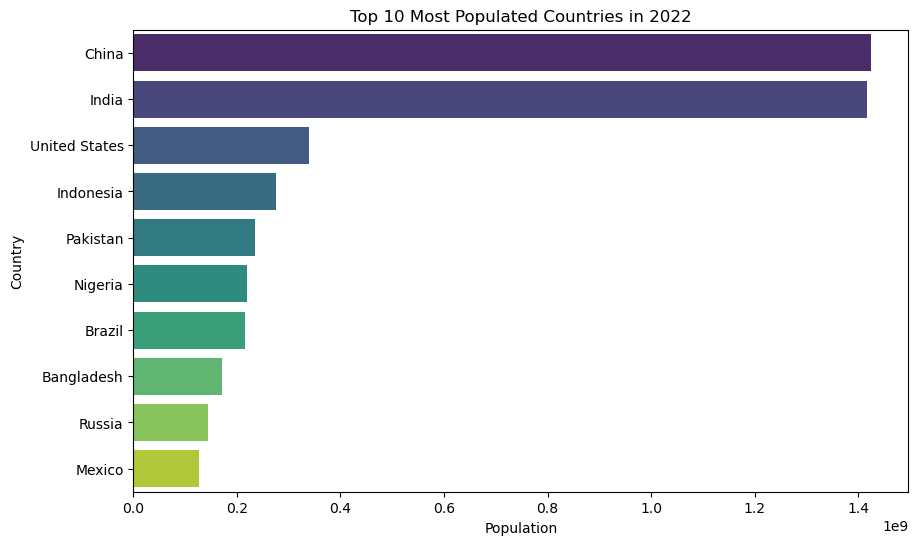

In [4]:
top10_pop = df.nlargest(10, '2022_Population')
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_pop, y='Country/Territory', x='2022_Population', palette='viridis')
plt.title('Top 10 Most Populated Countries in 2022')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()


Population Growth Rate Distribution

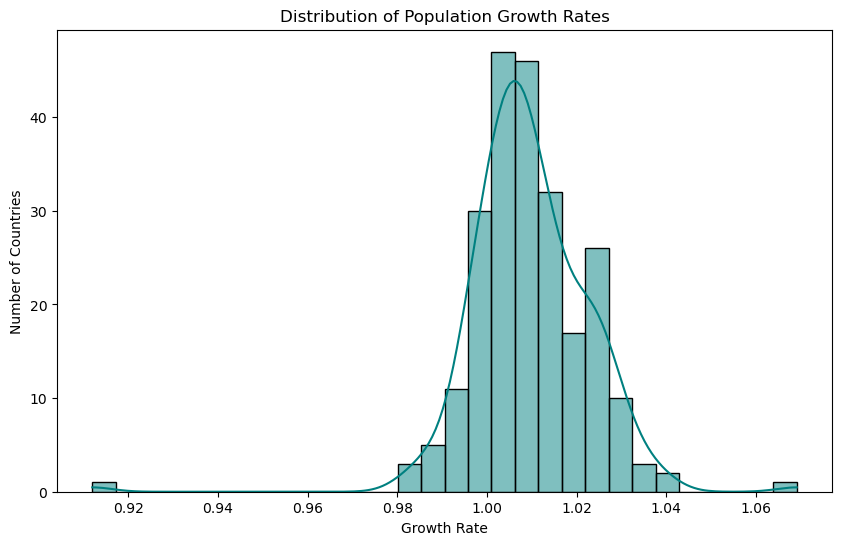

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['Growth_Rate'], bins=30, kde=True, color='teal')
plt.title("Distribution of Population Growth Rates")
plt.xlabel("Growth Rate")
plt.ylabel("Number of Countries")
plt.show()


Population Change Over Time(Global)

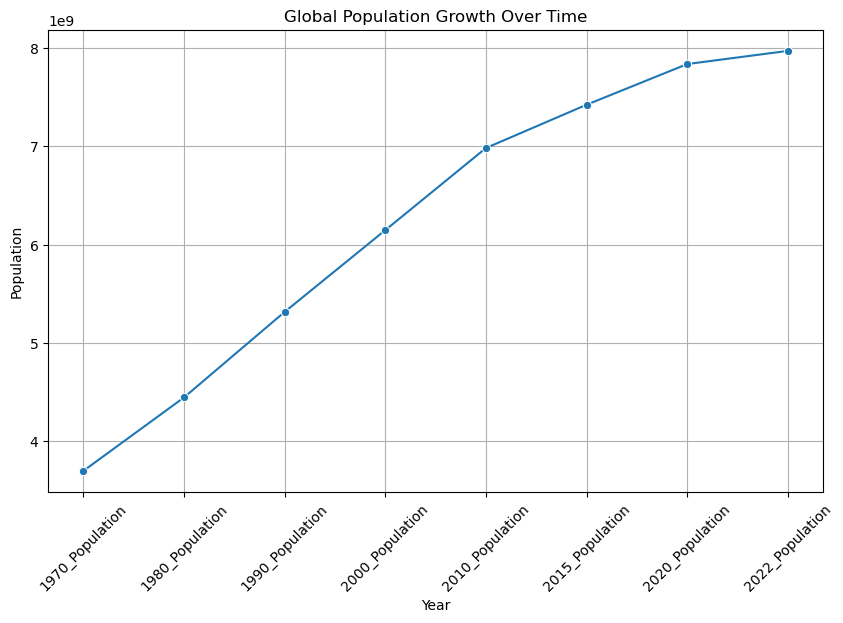

In [6]:
# Sum total world population across years
years = ['1970_Population', '1980_Population', '1990_Population', '2000_Population',
         '2010_Population', '2015_Population', '2020_Population', '2022_Population']

global_pop = df[years].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=years, y=global_pop.values, marker='o')
plt.title("Global Population Growth Over Time")
plt.ylabel("Population")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Continent wise Population Distribution (2022)

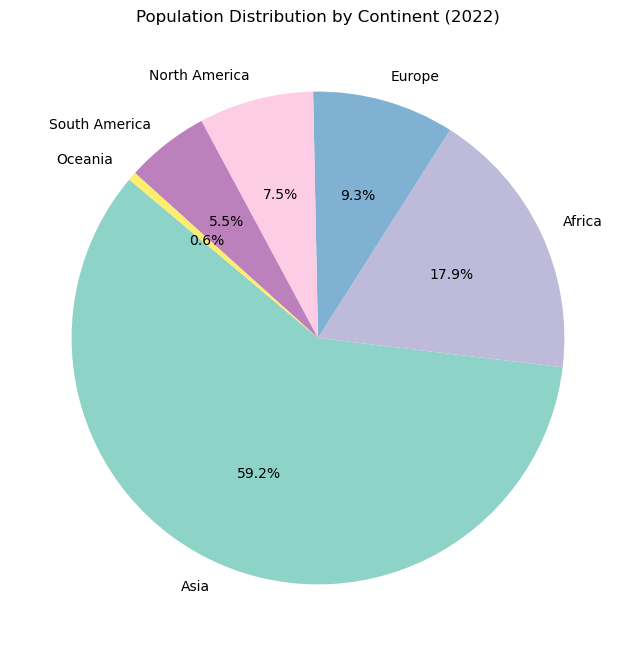

In [7]:
continent_pop = df.groupby('Continent')['2022_Population'].sum().sort_values(ascending=False)
continent_pop.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), startangle=140, colormap='Set3')
plt.title("Population Distribution by Continent (2022)")
plt.ylabel("")
plt.show()


Top 10 Countries by Density

C:\Users\ARSHISH KASHYAP\AppData\Local\Temp\ipykernel_20376\3656642188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_density, x='Density_per_km²', y='Country/Territory', palette='magma')


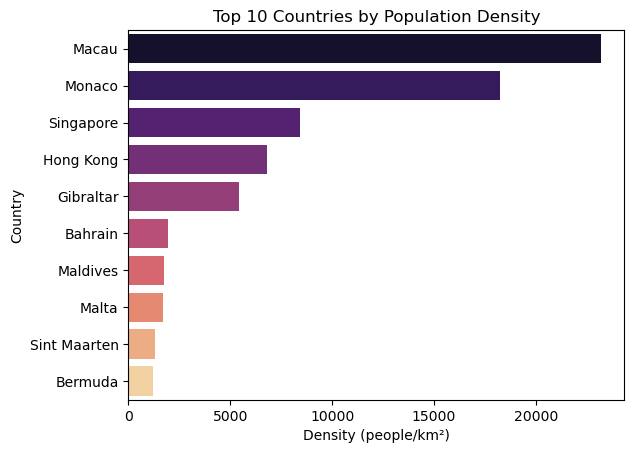

In [8]:
top_density = df.sort_values('Density_per_km²', ascending=False).head(10)
sns.barplot(data=top_density, x='Density_per_km²', y='Country/Territory', palette='magma')
plt.title("Top 10 Countries by Population Density")
plt.xlabel("Density (people/km²)")
plt.ylabel("Country")
plt.show()


Correlation Heatmap of Numerical Features

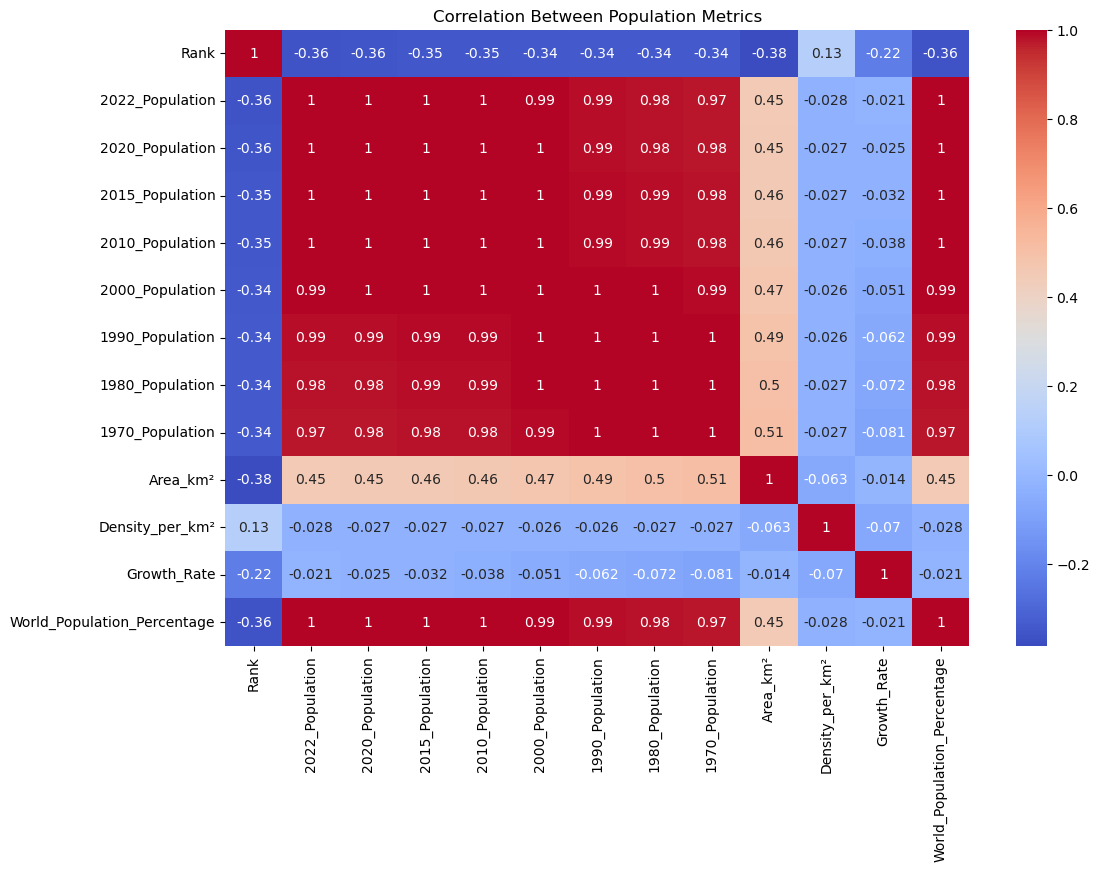

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Population Metrics")
plt.show()


Countries with Declining Population

In [10]:
decline = df[df['Growth_Rate'] < 1].sort_values('Growth_Rate')
decline[['Country/Territory', 'Growth_Rate']].head(10)


,Country/Territory,Growth_Rate
218,Ukraine,0.9120
112,Lebanon,0.9816
3,American Samoa,0.9831
30,Bulgaria,0.9849
117,Lithuania,0.9869
111,Latvia,0.9876
25,Bosnia and Herzegovina,0.9886
126,Marshall Islands,0.9886
184,Serbia,0.9897
46,Croatia,0.9927


World Population Share by Country (Top 10)

C:\Users\ARSHISH KASHYAP\AppData\Local\Temp\ipykernel_20376\1371400332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_share, x='World_Population_Percentage', y='Country/Territory', palette='cubehelix')


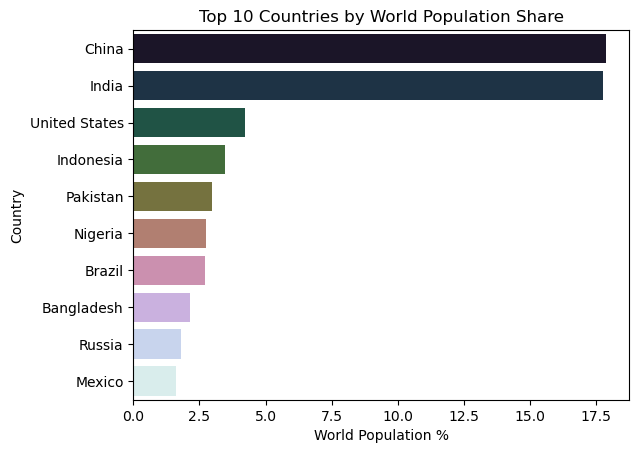

In [11]:
top_share = df.sort_values('World_Population_Percentage', ascending=False).head(10)
sns.barplot(data=top_share, x='World_Population_Percentage', y='Country/Territory', palette='cubehelix')
plt.title("Top 10 Countries by World Population Share")
plt.xlabel("World Population %")
plt.ylabel("Country")
plt.show()
